## Evaluation Notebook
Compare agent performance

In [1]:
# Imports
import pandas as pd
from utils.eval import *
from constants import *

# Get rid of pandas max width
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# User defined params
USE_LATEST_RUNS = True # use latest per agent or hand-selected run ("top")
results_dir = ALL_RUNS_DIR if USE_LATEST_RUNS else TOP_RUNS_DIR

# Get runs for each agent
result_filenames = get_latest_run_filenames(AGENT_LIST, results_dir)
print(result_filenames)

# Compile results
df = load_results(results_dir, result_filenames)
df = calculate_metrics(df)
df = calculate_scores(df)
df = calculate_normalized_scores(df)

display(df)

{'prescribed_chain': 'prescribed_chain_20240831111741.json', 'single_agent': 'single_agent_20240831120940.json', 'react_agent': 'react_agent_20240901115315.json', 'multi_agent_supervisor': 'multi_agent_supervisor_20240901120153.json'}


,101,102,103,104,105,106,107,108,109,110,201,202,203,204,205,206,207,208,209,210,mean,mean_t1,mean_t2,min,total_score,total_score_t1,total_score_t2,normalized_total_score_t1,normalized_total_score_t2,normalized_total_score
prescribed_chain,458.28,865.00,398.67,885.31,907.97,280.11,156.04,16.80,1871.20,88.45,231.76,6305.26,14513.89,119.21,3687.39,16309.76,14.18,108.40,3895.87,1153.19,2613.337000,592.7830,4633.891000,14.18,50411,30813,19598,3081.30,1959.800000,2520.550000
single_agent,252.03,17.41,398.67,113.71,2320.81,7.57,63.96,87.44,4394.52,NaN,2.90,NaN,NaN,119.21,3687.39,1983.74,25.97,137.96,3865.42,1153.19,1095.994118,850.6800,1371.972500,2.90,53586,33759,19827,3751.00,2478.375000,3152.117647
react_agent,NaN,136.00,NaN,113.64,NaN,267.31,NaN,4.62,NaN,NaN,4.02,NaN,14930.54,119.21,NaN,NaN,NaN,NaN,NaN,12.27,1948.451250,130.3925,3766.510000,4.02,34409,19483,14926,4870.75,3731.500000,4301.125000
multi_agent_supervisor,256.19,30.45,409.30,0.16,3.78,7.57,156.04,4.15,19.13,21.69,2.90,86.00,70.51,NaN,604.11,1482.48,127.82,NaN,NaN,5.24,193.383529,90.8460,339.865714,0.16,76726,48697,28029,4869.70,4004.142857,4513.294118


## Metrics

## Plot Points

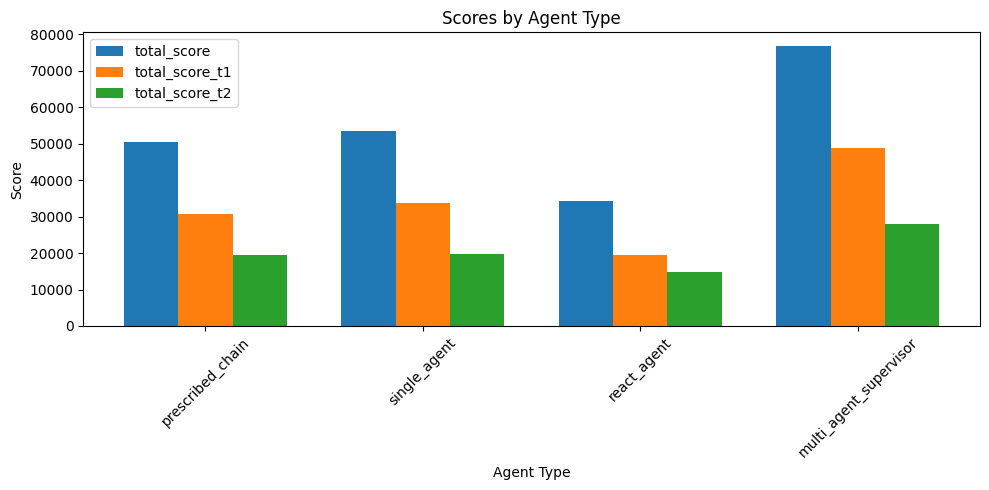

In [5]:
# Plot score columns for each agent type using a bar chart
plt.figure(figsize=(10, 5))
score_columns = ['total_score', 'total_score_t1', 'total_score_t2']
width = 0.25  # width of the bars

# Create bar positions
x = np.arange(len(df.index))
for i, score in enumerate(score_columns):
    plt.bar(x + i * width, df[score], width=width, label=score)

plt.xlabel('Agent Type')
plt.ylabel('Score')
plt.title('Scores by Agent Type')
plt.legend()
plt.xticks(x + width, df.index, rotation=45)
plt.tight_layout()
plt.show()


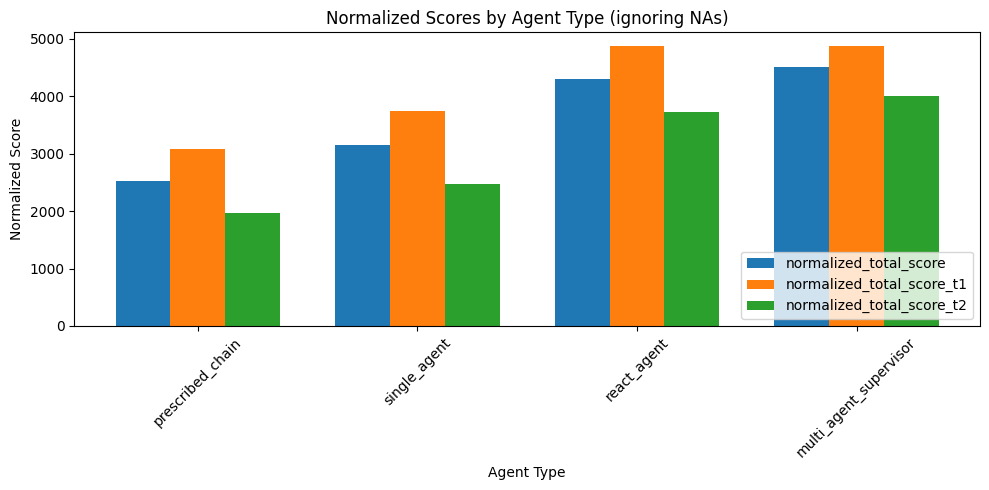

In [6]:
# Plot normalized score columns for each agent type using a bar chart
plt.figure(figsize=(10, 5))
score_columns = ['normalized_total_score', 'normalized_total_score_t1', 'normalized_total_score_t2']
width = 0.25  # width of the bars

# Create bar positions
x = np.arange(len(df.index))
for i, score in enumerate(score_columns):
    plt.bar(x + i * width, df[score], width=width, label=score)

plt.xlabel('Agent Type')
plt.ylabel('Normalized Score')
plt.title('Normalized Scores by Agent Type (ignoring NAs)')
plt.legend(loc='lower right')
plt.xticks(x + width, df.index, rotation=45)
plt.tight_layout()
plt.show()


### Average Distance (excluding NANs)

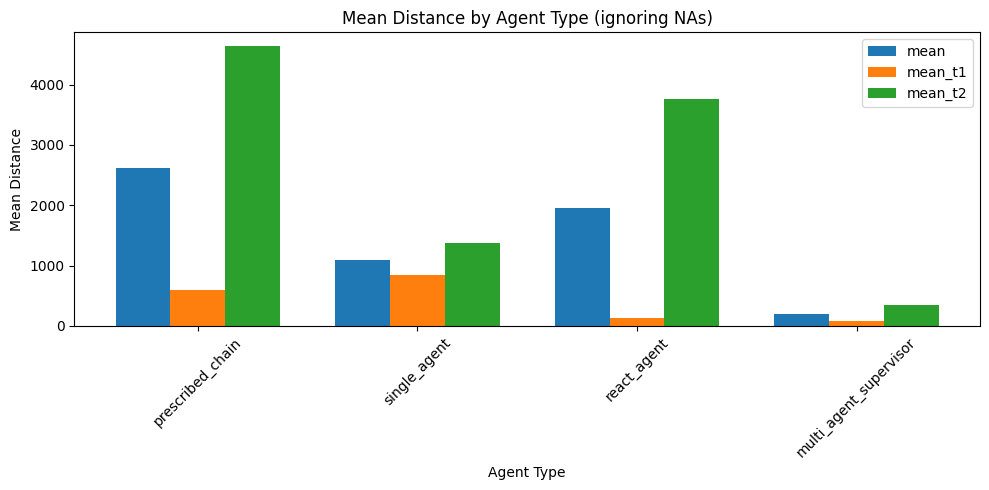

In [7]:
# Plot normalized score columns for each agent type using a bar chart
plt.figure(figsize=(10, 5))
score_columns = ['mean', 'mean_t1', 'mean_t2']
width = 0.25  # width of the bars

# Create bar positions
x = np.arange(len(df.index))
for i, score in enumerate(score_columns):
    plt.bar(x + i * width, df[score], width=width, label=score)

plt.xlabel('Agent Type')
plt.ylabel('Mean Distance')
plt.title('Mean Distance by Agent Type (ignoring NAs)')
plt.legend(loc='upper right')
plt.xticks(x + width, df.index, rotation=45)
plt.tight_layout()
plt.show()


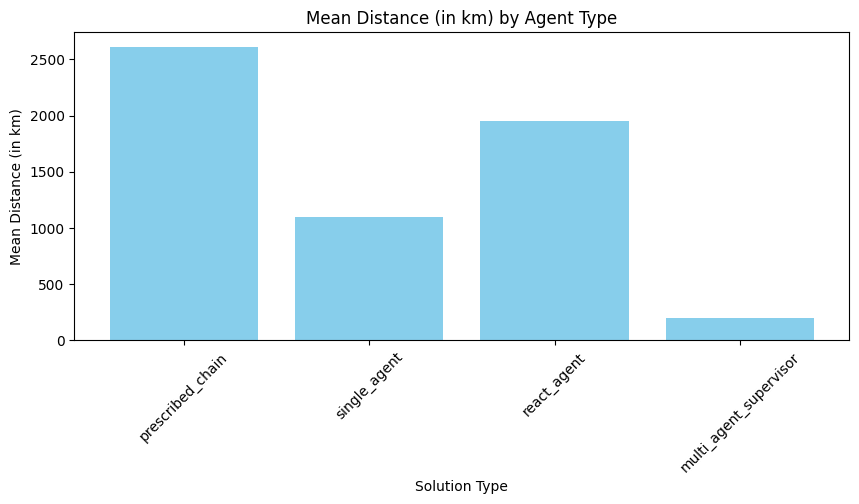

In [9]:
# Plot a bar chart of the mean column
plt.figure(figsize=(10, 4))
plt.bar(df.index, df['mean'], color='skyblue')
plt.xlabel('Solution Type')
plt.ylabel('Mean Distance (in km)')
plt.title('Mean Distance (in km) by Agent Type')
plt.xticks(rotation=45)
plt.show()

### Error Plots by Agent Type

#### 100 Level

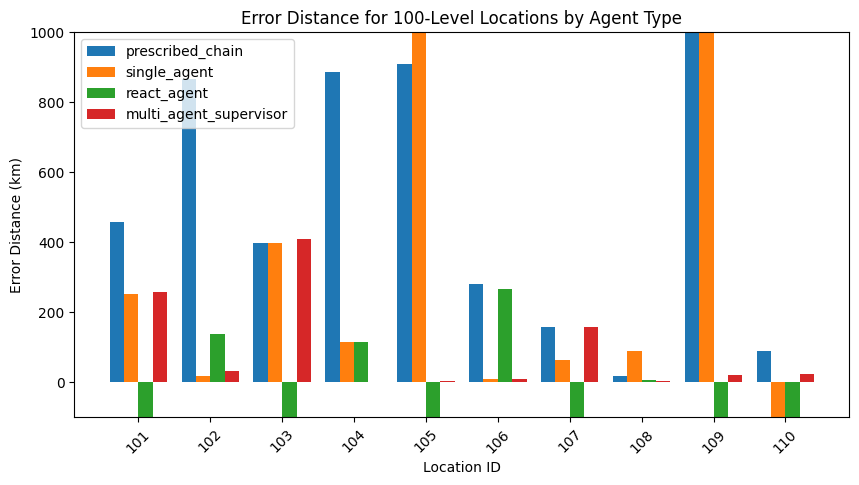

In [10]:
# Plotting values for each index for specified columns with multi-bar chart
plt.figure(figsize=(10, 5))
index_labels = df.index
bar_width = 0.2
x = np.arange(len(t1_cols))

for i, index_label in enumerate(index_labels):
    values = df.loc[index_label, t1_cols].fillna(-99)  # Replace NA values with -99
    plt.bar(x + i * bar_width, values, bar_width, label=index_label)

plt.xlabel('Location ID')
plt.ylabel('Error Distance (km)')
plt.title('Error Distance for 100-Level Locations by Agent Type')
plt.xticks(x + bar_width * (len(index_labels) - 1) / 2, t1_cols)
plt.xticks(rotation=45)
plt.ylim(-100, 1000)
plt.legend()
plt.show()


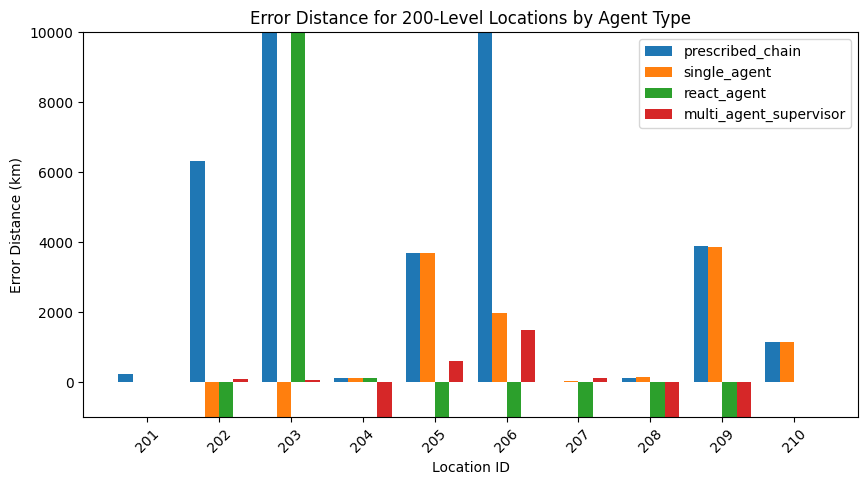

In [11]:
# Plotting values for each index for specified columns with multi-bar chart
plt.figure(figsize=(10, 5))
index_labels = df.index
bar_width = 0.2
x = np.arange(len(t2_cols))

for i, index_label in enumerate(index_labels):
    values = df.loc[index_label, t2_cols].fillna(-999)  # Replace NA values with -99
    plt.bar(x + i * bar_width, values, bar_width, label=index_label)

plt.xlabel('Location ID')
plt.ylabel('Error Distance (km)')
plt.title('Error Distance for 200-Level Locations by Agent Type')
plt.xticks(x + bar_width * (len(index_labels) - 1) / 2, t2_cols)
plt.xticks(rotation=45)
plt.ylim(-1000, 10000)
plt.legend()
plt.show()

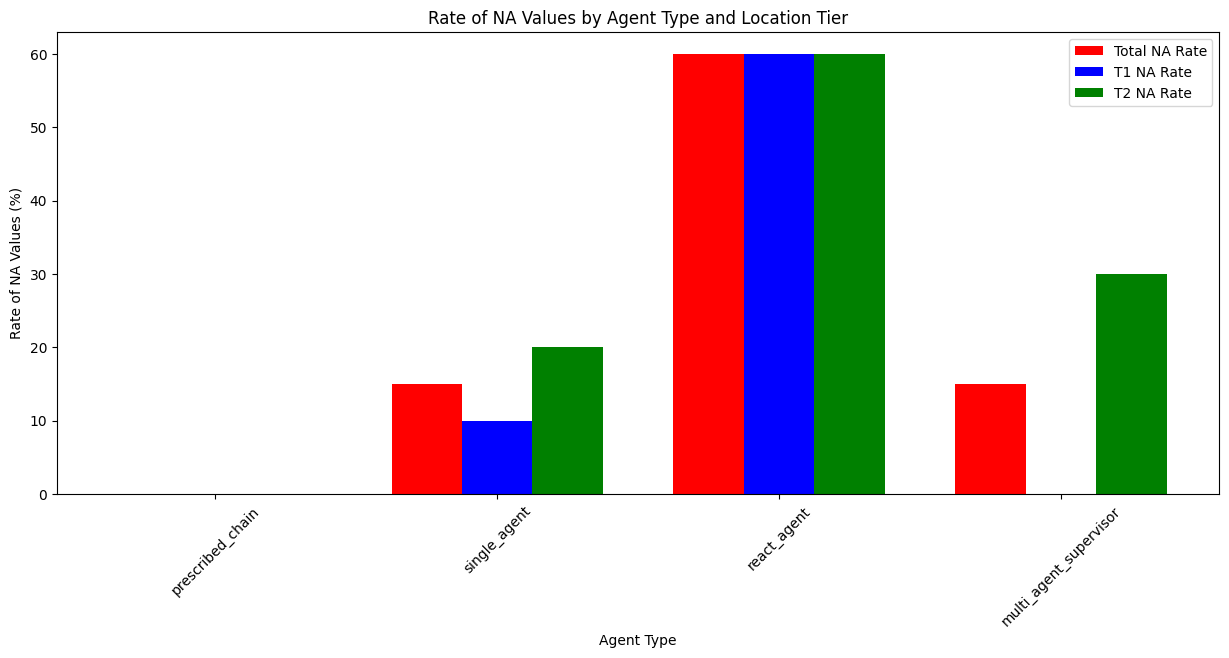

In [12]:
# Calculate the percentage of NA values for each index in the DataFrame and plot as a bar chart
# Splitting the NA count by total NA rate, NA rate for t1_cols and t2_cols

na_percentage_total = round(df[t1_cols + t2_cols].isna().mean(axis=1) * 100, 2)
na_percentage_t1 = round(df[t1_cols].isna().mean(axis=1) * 100, 2)
na_percentage_t2 = round(df[t2_cols].isna().mean(axis=1) * 100, 2)

plt.figure(figsize=(15, 6))
x = np.arange(len(df.index))
width = 0.25  # width of the bars

plt.bar(x, na_percentage_total, color='red', width=width, label='Total NA Rate')
plt.bar(x + width, na_percentage_t1, color='blue', width=width, label='T1 NA Rate')
plt.bar(x + 2 * width, na_percentage_t2, color='green', width=width, label='T2 NA Rate')

plt.xlabel('Agent Type')
plt.ylabel('Rate of NA Values (%)')
plt.title('Rate of NA Values by Agent Type and Location Tier')
plt.xticks(x + width, df.index, rotation=45)
plt.legend()
plt.show()
